# Assignment 1

## Task 5 - Data pre-processing

This jupyter notebook will contain the methodology description for mainly pre-processing for each of the 2 main tasks we chose: Regression and Classification. I will be describing the general pipeline for loading and preprocessing the data, along with giving a general flow for the steps taken for each task.
I will be also providing some insights on how we can start the predictive data mining part afterwards.

We will more or like follow this pipeline. Let's start with loading the dataset. 

In our case, we found a very comprehensive dataset in kaggle: https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture.

Thus, we can ignore the Data Combination step as the data integration challenge is already overcome.

In [2]:
import pandas as pd

# Load the kaggle dataset which contains the data about climate change impact on agriculture
df = pd.read_csv('data/climate_change_impact_on_agriculture_2024.csv')

Let's explore the data

In [3]:
df.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

In [4]:
df.tail()

Year    Country              Region Crop_Type  Average_Temperature_C  \
9995  2022     France  Nouvelle-Aquitaine    Cotton                  30.48   
9996  1999  Australia          Queensland  Soybeans                   9.53   
9997  2000  Argentina           Patagonia    Coffee                  31.92   
9998  1996     Brazil           Southeast  Soybeans                  13.95   
9999  2015      China               South      Corn                  11.78   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
9995                  685.93             17.64                 3.033   
9996                 2560.38             10.68                 2.560   
9997                  357.76             26.01                 1.161   
9998                 1549.52             17.31                 3.348   
9999                 1676.25              5.34                 3.710   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
9995                       9                27.56                    41.96   
9996                       4                77.02                     5.45   
9997                      10                78.53                    11.94   
9998                       2                42.65                    44.71   
9999                       5                46.41                    48.28   

      Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
9995                     10.95              43.41         No Adaptation   
9996                     82.32              59.39         No Adaptation   
9997                     26.00              41.46      Water Management   
9998                     25.07              75.10         Crop Rotation   
9999                     98.27              59.38      Water Management   

      Economic_Impact_Million_USD  
9995                      1483.06  
9996                       829.61  
9997                       155.99  
9998                      1613.90  
9999                       453.14

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

From a first look, this data can defenitely help us with our objective: Study food availabilty, water scarcity, and economic impact on African developing countries in relation with global warming over the past decades.


We will be doing predictive data mining to anticipate future tempratures and precipitations.
Let's start the data pre-processing pipeline for this data while concentrating on regression.

In [6]:
# Check null values
df.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [7]:
# Data reorgonization
# Sort data by years
df = df.sort_values(by='Year')

In [8]:
df.head()

Year    Country      Region   Crop_Type  Average_Temperature_C  \
4225  1990      China       North       Wheat                   4.21   
694   1990     Brazil   Northeast   Sugarcane                   2.53   
188   1990  Argentina      Pampas       Wheat                  14.98   
7343  1990    Nigeria  North West      Barley                  30.02   
2505  1990  Argentina      Pampas  Vegetables                  17.56   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
4225                 1544.36             23.91                 1.098   
694                   818.35             26.60                 2.115   
188                  1175.60             25.88                 4.383   
7343                 1900.22             15.67                 3.402   
2505                 1517.35             18.70                 3.483   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
4225                       4                46.96                    29.73   
694                        3                64.28                    10.28   
188                        8                57.06                    20.34   
7343                       9                40.47                    31.58   
2505                       3                42.85                    12.24   

      Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
4225                     46.67              37.80       Organic Farming   
694                      73.15              53.70      Water Management   
188                      60.94              65.92         No Adaptation   
7343                     44.36              77.78       Organic Farming   
2505                     53.53              32.89         Crop Rotation   

      Economic_Impact_Million_USD  
4225                       413.94  
694                        285.66  
188                       1177.04  
7343                      1149.29  
2505                       849.05

We want to concentrate on the African region. For that, let's explore more the Region column and see its possible values.

In [9]:
# Print the possible values of Region in df and the occurence of each one
all_regions = df['Region'].value_counts()
number_regions = len(all_regions)
print(f"We have {number_regions} regions.")
all_regions

We have 34 regions.


Region
South                         754
Northeast                     752
North                         524
Central                       466
Punjab                        288
Victoria                      283
New South Wales               276
East                          273
South West                    270
Ontario                       269
West Bengal                   267
North West                    264
Volga                         261
South East                    260
West                          257
Grand Est                     254
Queensland                    253
Midwest                       253
Nouvelle-Aquitaine            252
Patagonia                     249
Tamil Nadu                    249
Northwest                     247
Siberian                      246
Prairies                      243
British Columbia              242
Ile-de-France                 236
Provence-Alpes-Cote d’Azur    236
North Central                 235
Quebec                        230
Northwe

We can see that the region does not matter in this case, as it is country-specific. Thus, we need to manually select african countries.

In [10]:
# Select only the rows of df with African countries by using the Country column
all_african_countries = [
    "Algeria",
    "Angola",
    "Zimbabwe"
    "Zambia",
    "Uganda",
    "Tunisia",
    "Togo",
    "Tanzania",
    "Sudan",
    "South Sudan",
    "South Africa",
    "Somalia",
    "Sierra Leone",
    "Seychelles",
    "Senegal",
    "Sao Tome and Principe",
    "Rwanda",
    "Nigeria",
    "Niger",
    "Namibia",
    "Mozambique",
    "Morocco",
    "Mauritius",
    "Mauritania",
    "Mali",
    "Malawi",
    "Madagascar",
    "Libya",
    "Liberia",
    "Lesotho",
    "Kenya",
    "Guinea-Bissau",
    "Guinea",
    "Ghana",
    "Gambia",
    "Gabon",
    "Ethiopia",
    "Eswatini",
    "Eritrea",
    "Equatorial Guinea",
    "Egypt",
    "Djibouti",
    "Cote d'Ivoire",
    "Congo",
    "Comoros",
    "Chad",
    "Central African Republic",
    "Cameroon",
    "Cabo Verde",
    "Burundi",
    "Burkina Faso",
    "Botswana",
    "Benin",
]

df_africa = df[df['Country'].isin(all_african_countries)]

In [11]:
df_africa.head()

Year  Country         Region  Crop_Type  Average_Temperature_C  \
7343  1990  Nigeria     North West     Barley                  30.02   
7186  1990  Nigeria     South West       Rice                   9.10   
7102  1990  Nigeria  North Central  Sugarcane                  18.68   
2279  1990  Nigeria     North West     Barley                  -0.92   
2424  1990  Nigeria  North Central     Coffee                  21.67   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
7343                 1900.22             15.67                 3.402   
7186                 1404.53             21.83                 1.890   
7102                 2904.06              3.42                 3.680   
2279                 1081.11             14.02                 2.430   
2424                 1718.62              6.01                 2.820   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
7343                       9                40.47                    31.58   
7186                       7                65.74                     9.89   
7102                       7                61.66                    10.96   
2279                       5                17.30                    42.33   
2424                       8                89.20                    46.95   

      Fertilizer_Use_KG_per_HA  Soil_Health_Index    Adaptation_Strategies  \
7343                     44.36              77.78          Organic Farming   
7186                     79.76              98.42         Water Management   
7102                     20.49              34.79            Crop Rotation   
2279                     68.93              41.63  Drought-resistant Crops   
2424                     57.81              70.11          Organic Farming   

      Economic_Impact_Million_USD  
7343                      1149.29  
7186                       384.27  
7102                       849.47  
2279                       426.64  
2424                       819.91

In [12]:
df_africa.count()

Year                           1029
Country                        1029
Region                         1029
Crop_Type                      1029
Average_Temperature_C          1029
Total_Precipitation_mm         1029
CO2_Emissions_MT               1029
Crop_Yield_MT_per_HA           1029
Extreme_Weather_Events         1029
Irrigation_Access_%            1029
Pesticide_Use_KG_per_HA        1029
Fertilizer_Use_KG_per_HA       1029
Soil_Health_Index              1029
Adaptation_Strategies          1029
Economic_Impact_Million_USD    1029
dtype: int64

We can see that we have 1000+ rows for african countries, which should be enough for our case

In [13]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 7343 to 3716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1029 non-null   int64  
 1   Country                      1029 non-null   object 
 2   Region                       1029 non-null   object 
 3   Crop_Type                    1029 non-null   object 
 4   Average_Temperature_C        1029 non-null   float64
 5   Total_Precipitation_mm       1029 non-null   float64
 6   CO2_Emissions_MT             1029 non-null   float64
 7   Crop_Yield_MT_per_HA         1029 non-null   float64
 8   Extreme_Weather_Events       1029 non-null   int64  
 9   Irrigation_Access_%          1029 non-null   float64
 10  Pesticide_Use_KG_per_HA      1029 non-null   float64
 11  Fertilizer_Use_KG_per_HA     1029 non-null   float64
 12  Soil_Health_Index            1029 non-null   float64
 13  Adaptation_Strategie

In here, we can do some feature engineering.

In case we were looking more into positive impact of strategies year by year, we can use the Adaption_Strategies for that. However, we can ignore this feature right now and focus more into the chosen 2 data mining tasks.

As for country and region, we can combine both to get a more specific outlook of the situation.

In [14]:
# Remove the Adaption_Strategies column
df_africa = df_africa.drop(columns=['Adaptation_Strategies'])

# Add a new Country_Region that contains the concatenation of the Country and Region columns
df_africa['Country_Region'] = df_africa['Country'] + ' ' + df_africa['Region']

# Drop the Country and Region columns
df_africa = df_africa.drop(columns=['Country', 'Region'])

In [15]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 7343 to 3716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1029 non-null   int64  
 1   Crop_Type                    1029 non-null   object 
 2   Average_Temperature_C        1029 non-null   float64
 3   Total_Precipitation_mm       1029 non-null   float64
 4   CO2_Emissions_MT             1029 non-null   float64
 5   Crop_Yield_MT_per_HA         1029 non-null   float64
 6   Extreme_Weather_Events       1029 non-null   int64  
 7   Irrigation_Access_%          1029 non-null   float64
 8   Pesticide_Use_KG_per_HA      1029 non-null   float64
 9   Fertilizer_Use_KG_per_HA     1029 non-null   float64
 10  Soil_Health_Index            1029 non-null   float64
 11  Economic_Impact_Million_USD  1029 non-null   float64
 12  Country_Region               1029 non-null   object 
dtypes: float64(9), int64

In [16]:
# Check how many distinct Crop_Type
all_crops = df_africa['Crop_Type'].value_counts()
number_crops = len(all_crops)
print(f"We have {number_crops} crop types.")

We have 10 crop types.


In [17]:
# Check how many distinct Country_Region
all_country_regions = df_africa['Country_Region'].value_counts()
number_country_regions = len(all_country_regions)
print(f"We have {number_country_regions} country regions.")
all_country_regions

We have 4 country regions.


Country_Region
Nigeria South West       270
Nigeria North West       264
Nigeria South East       260
Nigeria North Central    235
Name: count, dtype: int64

Here, we realize that the dataset actually concentrates only on Nigeria as an African prototype.

So, we can fundamentally change the gneral objectif stanced above into this:

Study food availabilty, water scarcity, and economic impact on Nigeria as an example of a developing African country in relation with global warming over the past decades.

Now, we can move on to data encoding for categorical columns: Crop_Types, and Country_Region.

As we don't have many distinct values, we can use One-Hot Encoding.

In [18]:
# Apply one hot encoding on the Crop_Types column
df_africa = pd.get_dummies(df_africa, columns=['Crop_Type'])

# Check the first rows of the df_africa dataframe
df_africa.head()

Year  Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
7343  1990                  30.02                 1900.22             15.67   
7186  1990                   9.10                 1404.53             21.83   
7102  1990                  18.68                 2904.06              3.42   
2279  1990                  -0.92                 1081.11             14.02   
2424  1990                  21.67                 1718.62              6.01   

      Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
7343                 3.402                       9                40.47   
7186                 1.890                       7                65.74   
7102                 3.680                       7                61.66   
2279                 2.430                       5                17.30   
2424                 2.820                       8                89.20   

      Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  Soil_Health_Index  \
7343                    31.58                     44.36              77.78   
7186                     9.89                     79.76              98.42   
7102                    10.96                     20.49              34.79   
2279                    42.33                     68.93              41.63   
2424                    46.95                     57.81              70.11   

      ...  Crop_Type_Barley Crop_Type_Coffee  Crop_Type_Corn  \
7343  ...              True            False           False   
7186  ...             False            False           False   
7102  ...             False            False           False   
2279  ...              True            False           False   
2424  ...             False             True           False   

      Crop_Type_Cotton  Crop_Type_Fruits  Crop_Type_Rice  Crop_Type_Soybeans  \
7343             False             False           False               False   
7186             False             False            True               False   
7102             False             False           False               False   
2279             False             False           False               False   
2424             False             False           False               False   

      Crop_Type_Sugarcane  Crop_Type_Vegetables  Crop_Type_Wheat  
7343                False                 False            False  
7186                False                 False            False  
7102                 True                 False            False  
2279                False                 False            False  
2424                False                 False            False  

[5 rows x 22 columns]

In [19]:
# Apply one hot encoding on the Country_Region column
df_africa = pd.get_dummies(df_africa, columns=['Country_Region'])

# Check the first rows of the df_africa dataframe
df_africa.head()

Year  Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
7343  1990                  30.02                 1900.22             15.67   
7186  1990                   9.10                 1404.53             21.83   
7102  1990                  18.68                 2904.06              3.42   
2279  1990                  -0.92                 1081.11             14.02   
2424  1990                  21.67                 1718.62              6.01   

      Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
7343                 3.402                       9                40.47   
7186                 1.890                       7                65.74   
7102                 3.680                       7                61.66   
2279                 2.430                       5                17.30   
2424                 2.820                       8                89.20   

      Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  Soil_Health_Index  \
7343                    31.58                     44.36              77.78   
7186                     9.89                     79.76              98.42   
7102                    10.96                     20.49              34.79   
2279                    42.33                     68.93              41.63   
2424                    46.95                     57.81              70.11   

      ...  Crop_Type_Fruits  Crop_Type_Rice  Crop_Type_Soybeans  \
7343  ...             False           False               False   
7186  ...             False            True               False   
7102  ...             False           False               False   
2279  ...             False           False               False   
2424  ...             False           False               False   

      Crop_Type_Sugarcane  Crop_Type_Vegetables  Crop_Type_Wheat  \
7343                False                 False            False   
7186                False                 False            False   
7102                 True                 False            False   
2279                False                 False            False   
2424                False                 False            False   

      Country_Region_Nigeria North Central  Country_Region_Nigeria North West  \
7343                                 False                               True   
7186                                 False                              False   
7102                                  True                              False   
2279                                 False                               True   
2424                                  True                              False   

      Country_Region_Nigeria South East  Country_Region_Nigeria South West  
7343                              False                              False  
7186                              False                               True  
7102                              False                              False  
2279                              False                              False  
2424                              False                              False  

[5 rows x 25 columns]

In [20]:
# Checking the new dataframe for Africa (Nigeria) for the last time
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 7343 to 3716
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  1029 non-null   int64  
 1   Average_Temperature_C                 1029 non-null   float64
 2   Total_Precipitation_mm                1029 non-null   float64
 3   CO2_Emissions_MT                      1029 non-null   float64
 4   Crop_Yield_MT_per_HA                  1029 non-null   float64
 5   Extreme_Weather_Events                1029 non-null   int64  
 6   Irrigation_Access_%                   1029 non-null   float64
 7   Pesticide_Use_KG_per_HA               1029 non-null   float64
 8   Fertilizer_Use_KG_per_HA              1029 non-null   float64
 9   Soil_Health_Index                     1029 non-null   float64
 10  Economic_Impact_Million_USD           1029 non-null   float64
 11  Crop_Type_Barley   

Final step is data selection.

Let's start by mapping a scatterplot (pair grid plot) to determine the linearly dependent features among the non-encoded columns.

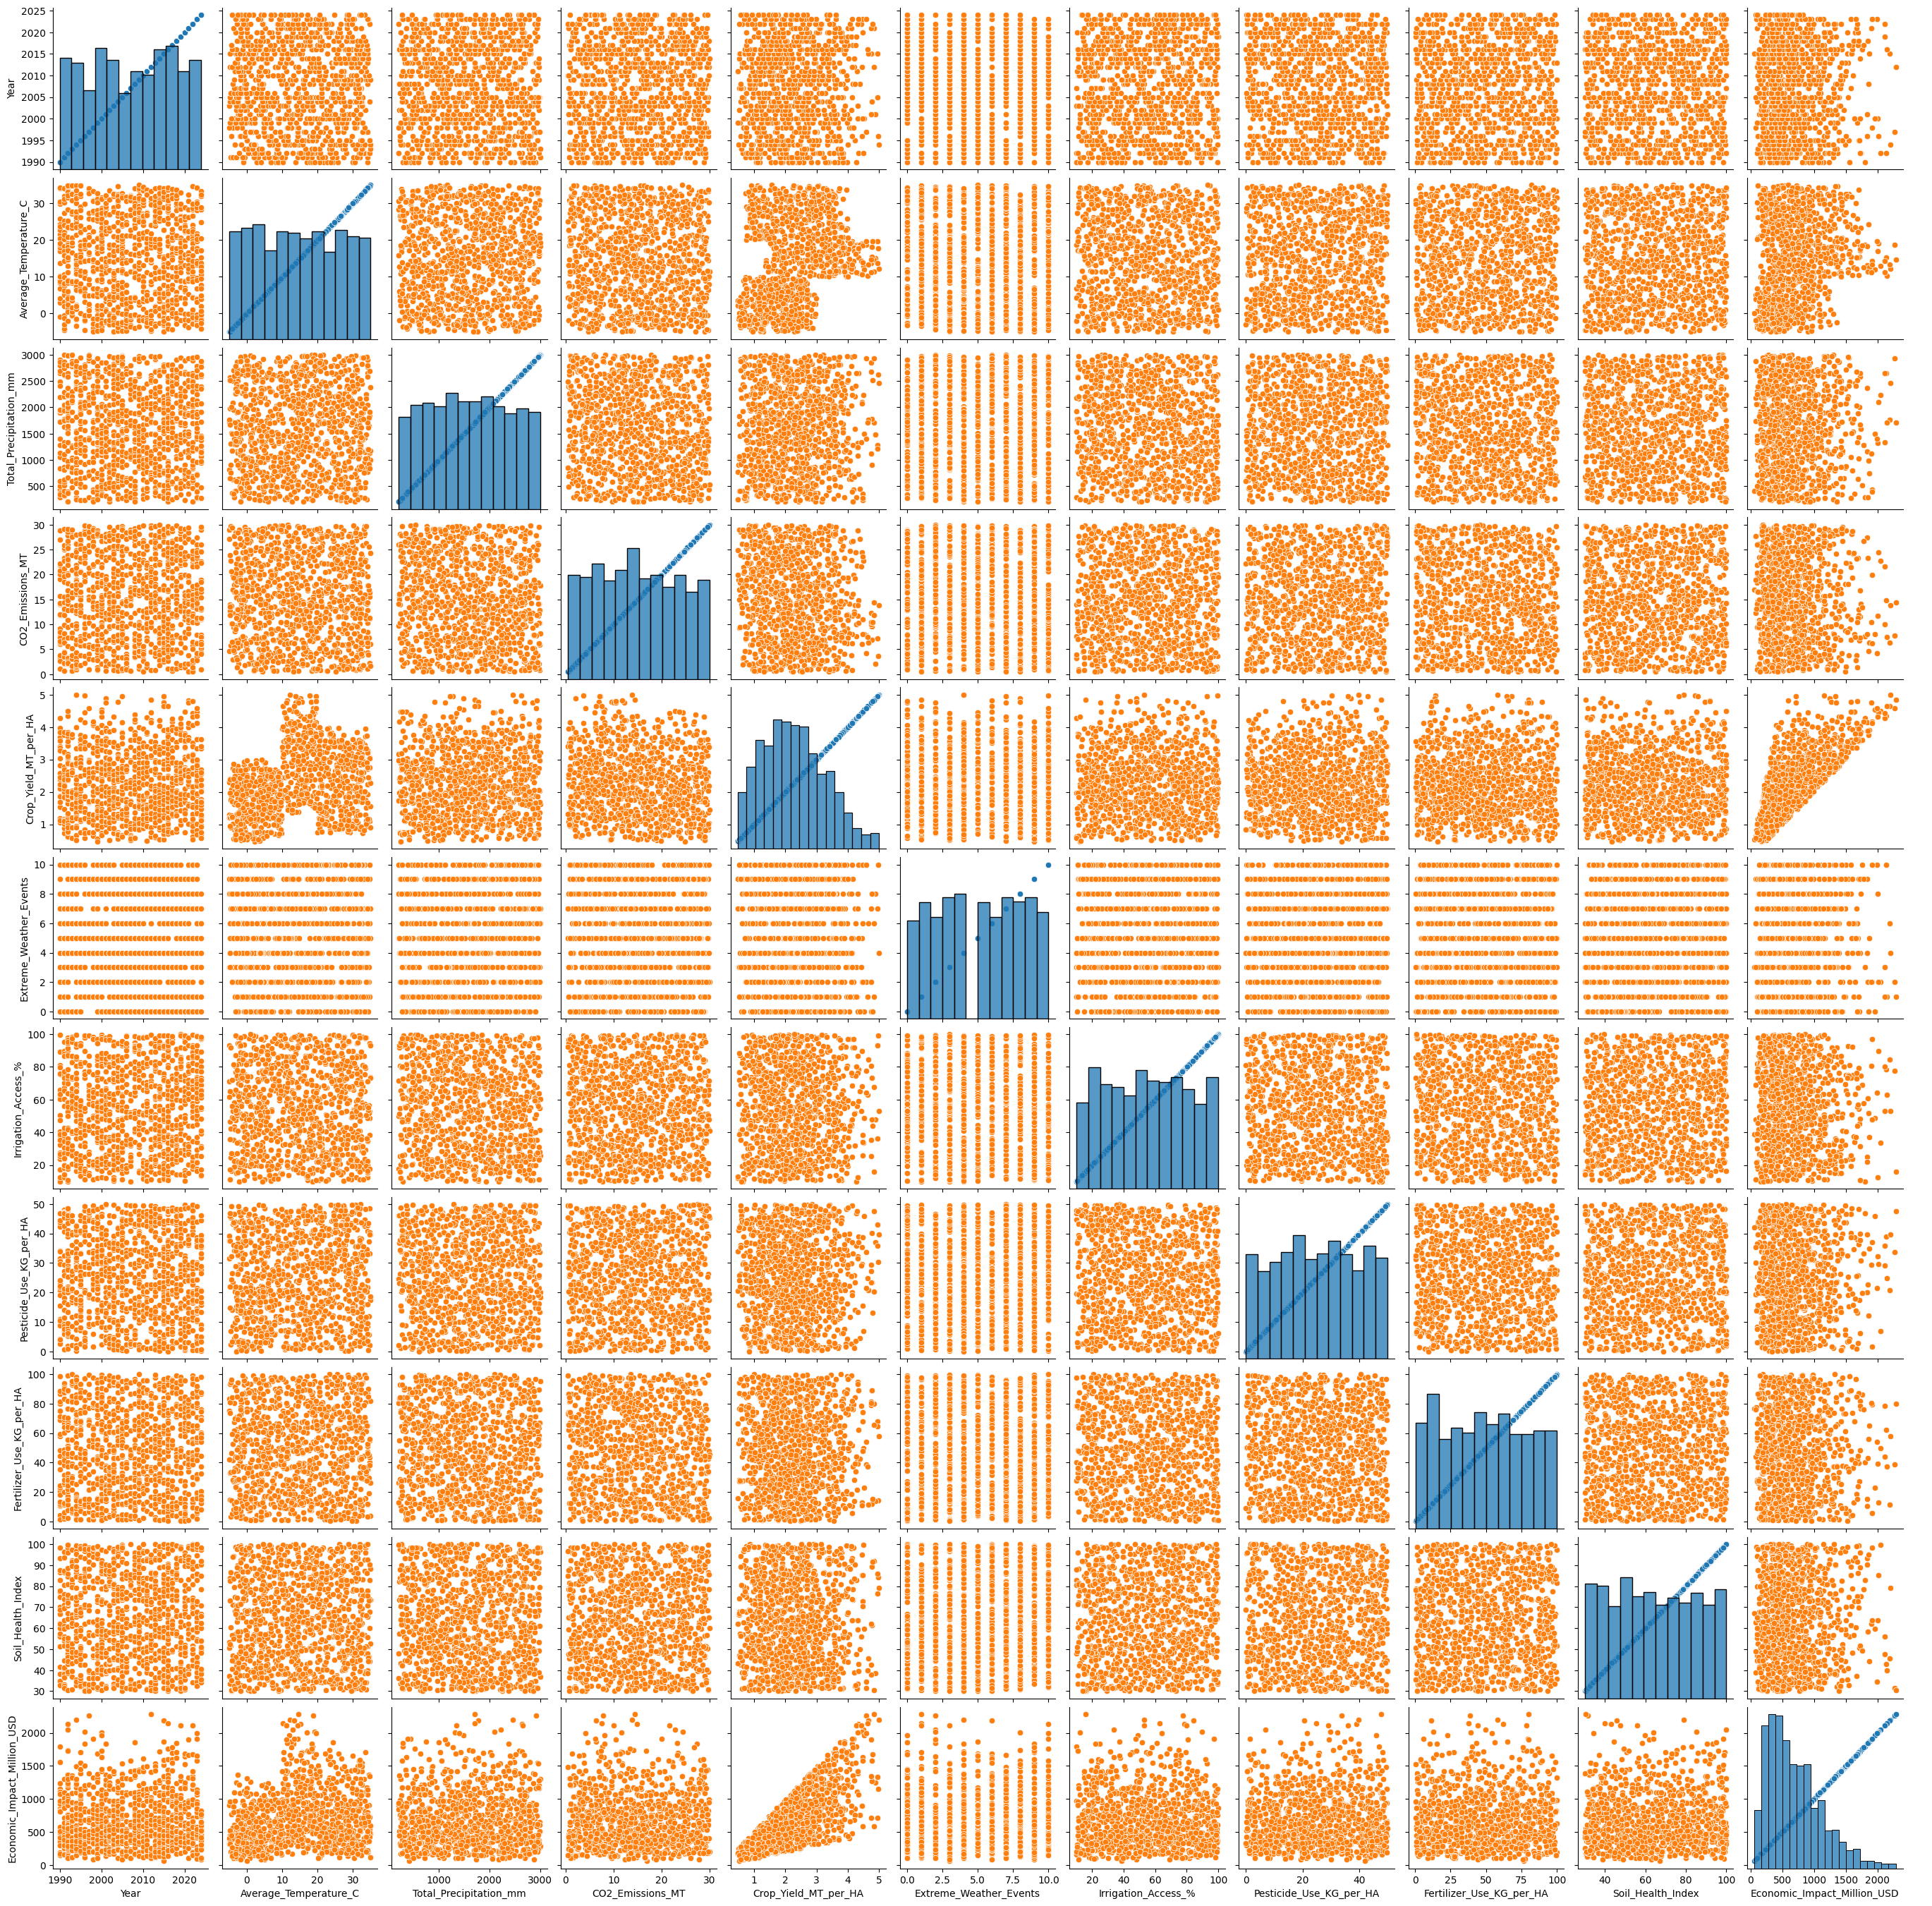

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the pair grid for the first 11 columns
pairplot = sns.pairplot(df_africa.iloc[:, :11])
pairplot.map(sns.scatterplot)
pairplot.add_legend()

plt.show()



We can notice that the Crop_Yield_MT_per_HA (for crop yield) and Economic_Impact_Million_USD (for economic impact) are linearly dependent. Thus, it makes sense to get rid of one of them for the sake of regression and classification.

In our case, the crop yield information is more critical. Therefore, we can drop the Economic_Impact_Million_USD column.

In [22]:
# Drop the Economic_Impact_Million_USD column
df_africa = df_africa.drop(columns=['Economic_Impact_Million_USD'])

We can also study highly-correlated features using a heatmap (Correlation matrix).

<Axes: >

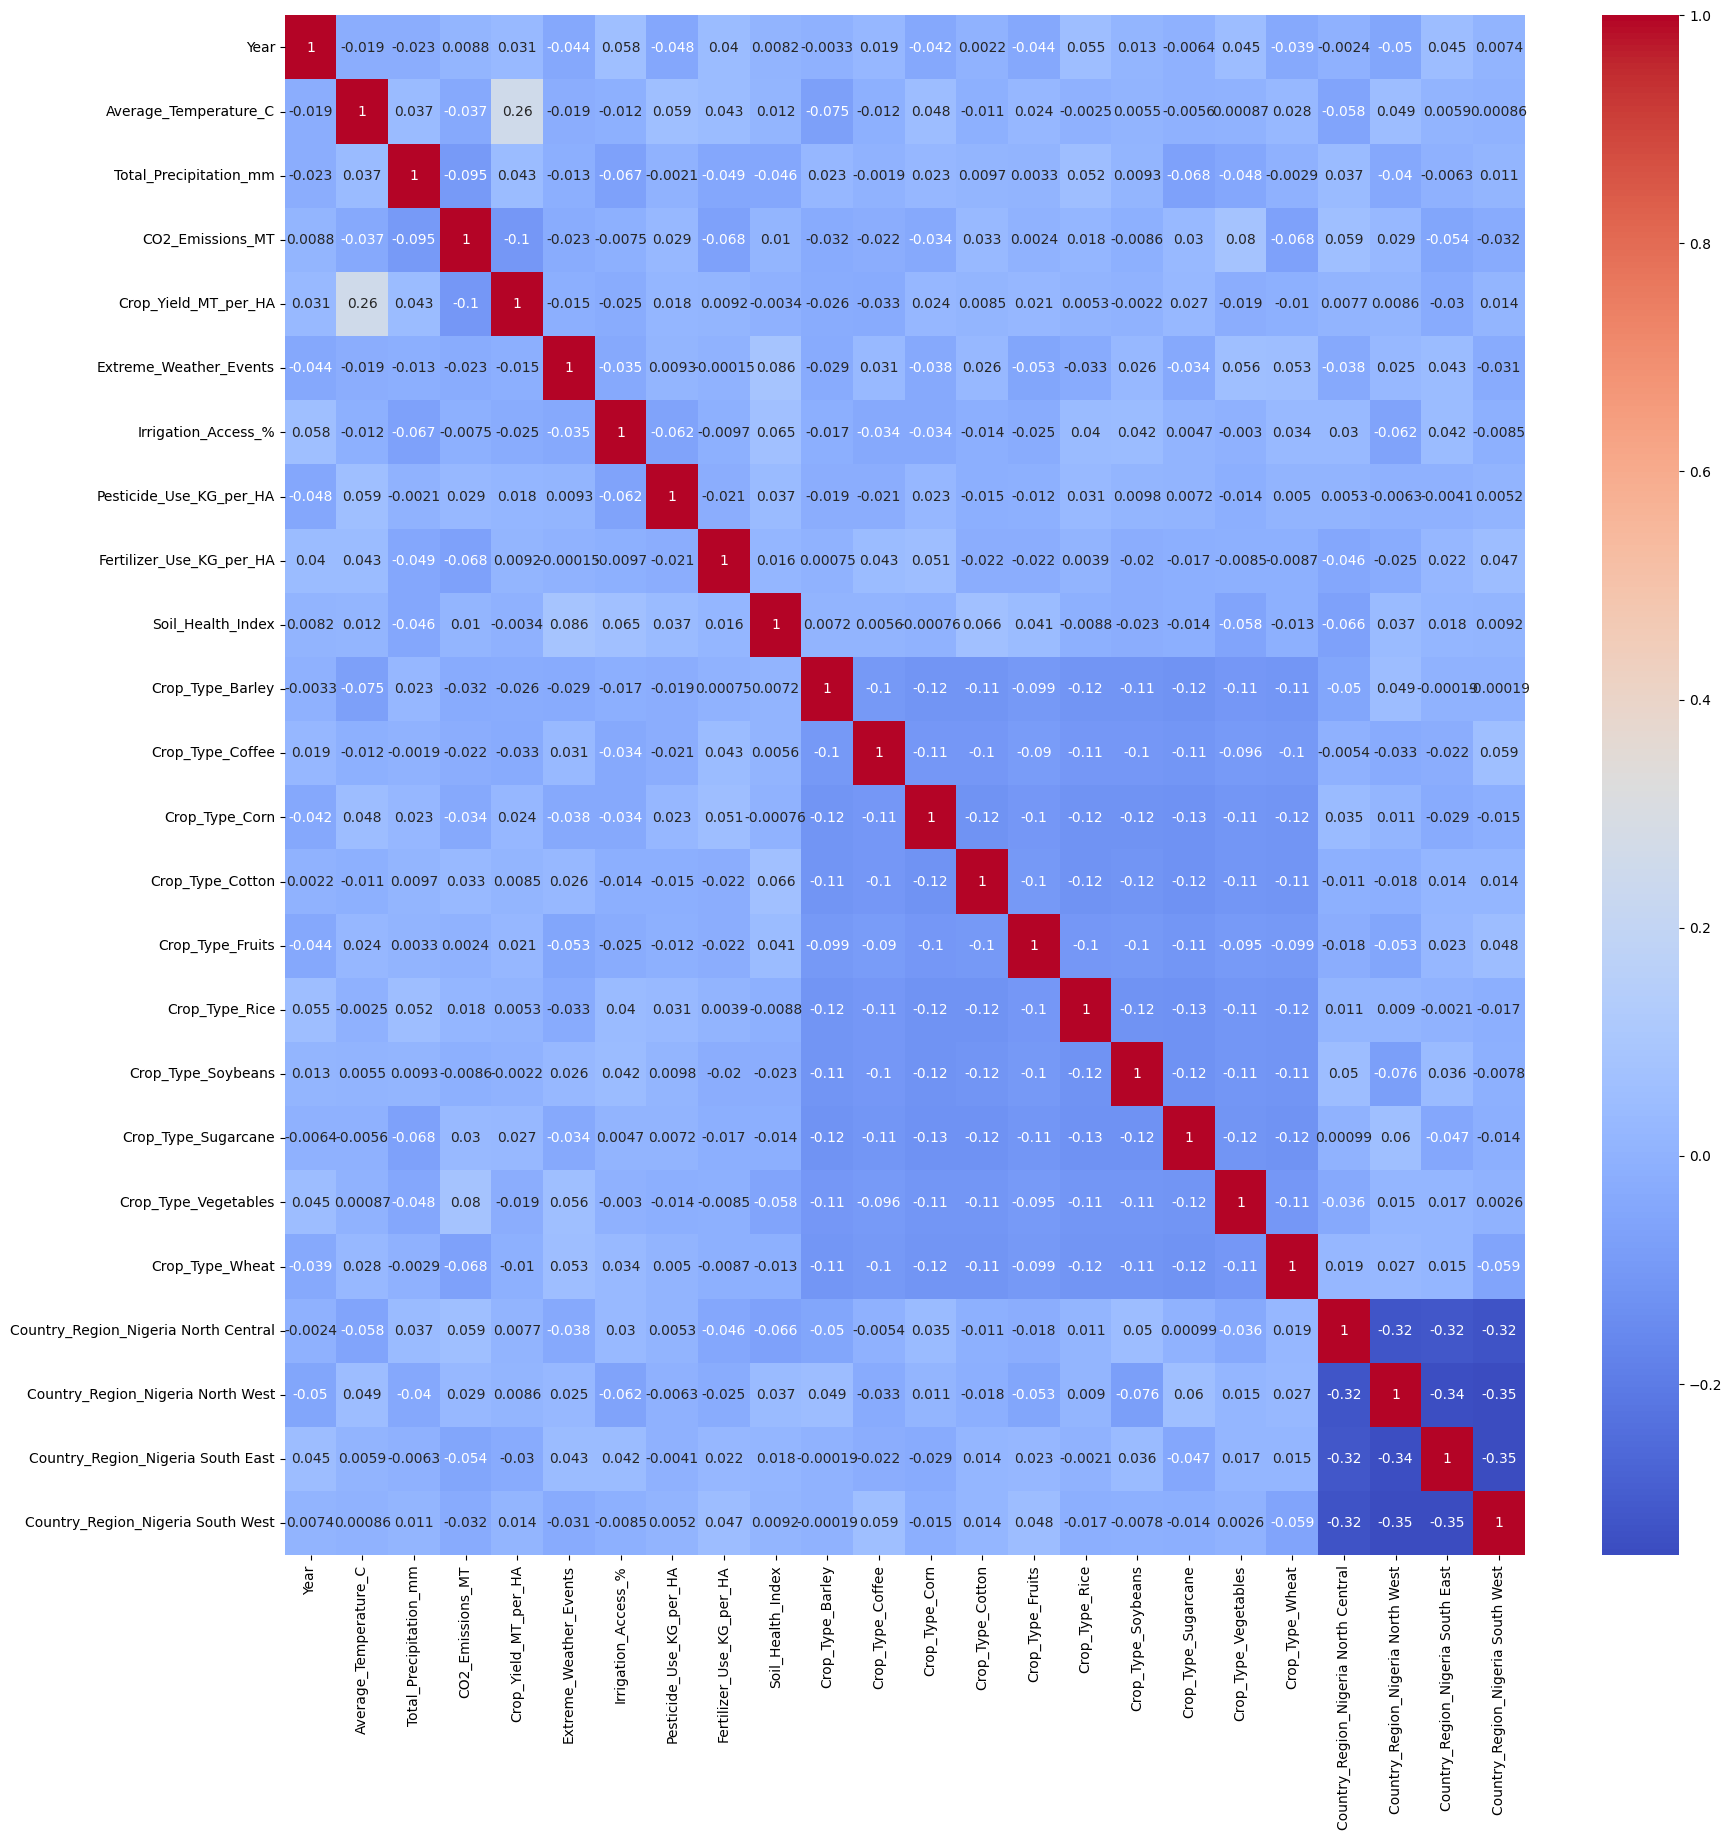

In [23]:
# Plot a correlation matrix for the data
plt.figure(figsize=(20, 20))
sns.heatmap(df_africa.corr(), annot=True, cmap='coolwarm')


In [24]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 7343 to 3716
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  1029 non-null   int64  
 1   Average_Temperature_C                 1029 non-null   float64
 2   Total_Precipitation_mm                1029 non-null   float64
 3   CO2_Emissions_MT                      1029 non-null   float64
 4   Crop_Yield_MT_per_HA                  1029 non-null   float64
 5   Extreme_Weather_Events                1029 non-null   int64  
 6   Irrigation_Access_%                   1029 non-null   float64
 7   Pesticide_Use_KG_per_HA               1029 non-null   float64
 8   Fertilizer_Use_KG_per_HA              1029 non-null   float64
 9   Soil_Health_Index                     1029 non-null   float64
 10  Crop_Type_Barley                      1029 non-null   bool   
 11  Crop_Type_Coffee   

All features are lowly correlated (abs < 0.5), which means each feature is important for the contribution to the model trainings.

As an additional step, we can do some visualization to check for outlier values.

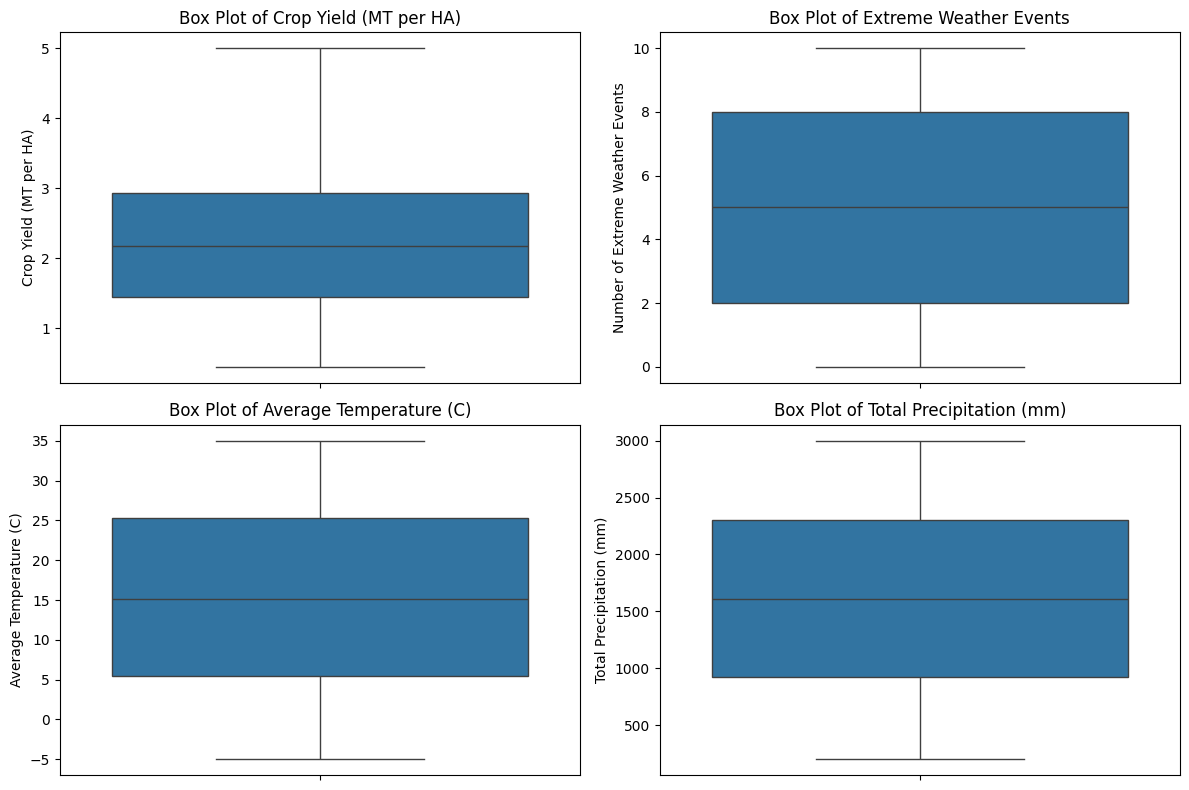

In [25]:
plt.figure(figsize=(12, 8))

# Box plot for Crop Yield
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Crop_Yield_MT_per_HA'])
plt.title('Box Plot of Crop Yield (MT per HA)')
plt.ylabel('Crop Yield (MT per HA)')

# Box plot for Extreme Weather Events
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Extreme_Weather_Events'])
plt.title('Box Plot of Extreme Weather Events')
plt.ylabel('Number of Extreme Weather Events')

# Box plot for Average Temperature
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Average_Temperature_C'])
plt.title('Box Plot of Average Temperature (C)')
plt.ylabel('Average Temperature (C)')

# Box plot for Total Precipitation
plt.subplot(2, 2, 4)
sns.boxplot(y=df['Total_Precipitation_mm'])
plt.title('Box Plot of Total Precipitation (mm)')
plt.ylabel('Total Precipitation (mm)')

plt.tight_layout()
plt.show()

We can see that the key features present no outliers.

In conclusion, the general objective of this Data Mining assignment for our group would be This:

Study food availabilty and water scarcity on Nigeria as an example of a developing African country in relation with global warming over the past decades.

For that, we use both Regression and Classification.

We use polynomial regression for the following over the years:
* We predict yearly temperature raise in function of precipitation, CO2 emissions, pesticide and fertilizer use, crop type, and country region.
* We predict yearly precipitation in function of temperature, extreme events, crop type, and country region.
* We predict extreme events in function of country region, CO2 emissions, and pesticide and fertilizer use.
* We predict crop yield in function of all other features.

We use classification for the following:
* We classify the country region in a specific year into either the critical or non-critical situation.

In order to do that, we have to engineer a new column in the dataset with 2 values: 0 for non-critical, and 1 for critical. Then, we use this column as a label for our classification model.

Furthermore, we can combine both regression and classification for further analysis: We can predict the values of features in the future using the regression models, and input them to our classification model for a future classification prediction.

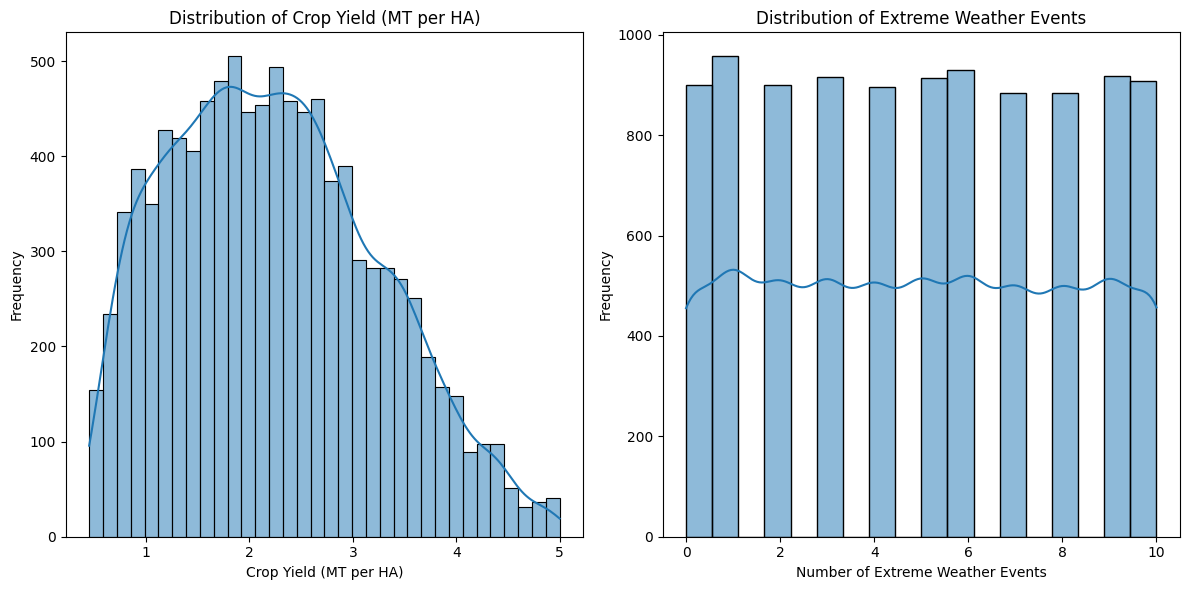

In [26]:
# Add a new column for classification
# This column will contain 0 if the food situation is non-critical, and 1 otherwise
# Let's start by visualizing Crop_Yield_MT_per_HA and Extreme_Weather_Events value distribution
plt.figure(figsize=(12, 6))

# Histogram for Crop Yield
plt.subplot(1, 2, 1)
sns.histplot(df['Crop_Yield_MT_per_HA'], kde=True)
plt.title('Distribution of Crop Yield (MT per HA)')
plt.xlabel('Crop Yield (MT per HA)')
plt.ylabel('Frequency')

# Histogram for Extreme Weather Events
plt.subplot(1, 2, 2)
sns.histplot(df['Extreme_Weather_Events'], kde=True)
plt.title('Distribution of Extreme Weather Events')
plt.xlabel('Number of Extreme Weather Events')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
# Define the criteria for a critical food situation
def is_critical(row):
    if row['Crop_Yield_MT_per_HA'] < threshold_yield or row['Extreme_Weather_Events'] > threshold_events:
        return 1
    else:
        return 0

threshold_yield = 2.0  
threshold_events = 6   

# Apply the function to create the new column
df['is_critical'] = df.apply(is_critical, axis=1)

In [28]:
print(df[['Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'is_critical']].head())

      Crop_Yield_MT_per_HA  Extreme_Weather_Events  is_critical
4225                 1.098                       4            1
694                  2.115                       3            0
188                  4.383                       8            1
7343                 3.402                       9            1
2505                 3.483                       3            0


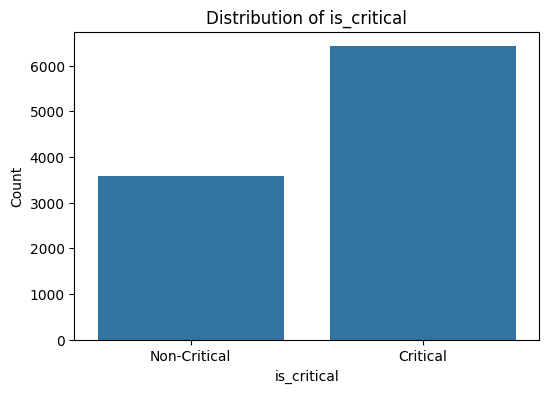

In [29]:
# Check the balance of the data in order to accurately choose the classification metrics
# Count the occurrences of each class
critical_counts = df['is_critical'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=critical_counts.index, y=critical_counts.values)
plt.title('Distribution of is_critical')
plt.xlabel('is_critical')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Critical', 'Critical'])
plt.show()

The data is imbalanced, thus we can use this metrics:
* Recall: as the cost of false negative can have bad impact. We need to accurately predict that a region situation is critical if it is actual critical.
* ROC-AUC: to evaluate the performance of our binary classifier.